Instantiating the VGG16 convolutional base

In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [4]:
base_dir = '/home/student/Documents/deep_learning_practice/Chapter_05/cat_and_dogs_small'

In [5]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [6]:
datagen = ImageDataGenerator(rescale=1./255)

In [7]:
batch_size = 20

In [8]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory, 
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break  # Note that because data generators yield 
                   # data indefinitely in a loop, you must 
                   # break afer every image has been seen once.
    return features, labels

In [9]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Defining and training the densely connected classifier

In [11]:
from keras import models
from keras import layers
from keras import optimizers

In [12]:
model = models.Sequential()

In [13]:
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [15]:
history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5805 - acc: 0.6920 - val_loss: 0.4518 - val_acc: 0.8110
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4268 - acc: 0.8135 - val_loss: 0.3808 - val_acc: 0.8390
Epoch 3/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3616 - acc: 0.8480 - val_loss: 0.3298 - val_acc: 0.8870
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3225 - acc: 0.8730 - val_loss: 0.3078 - val_acc: 0.8820
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2938 - acc: 0.8760 - val_loss: 0.2972 - val_acc: 0.8790
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2688 - acc: 0.9020 - val_loss: 0.2909 - val_acc: 0.8780
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2508 - acc: 0.9020 - val_loss: 0.2745 - val_acc: 0.8900
Epoch 8/30
200

Plotting the results

In [16]:
import matplotlib.pyplot as plt

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

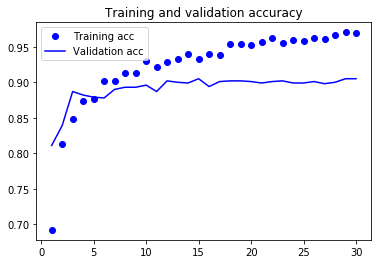

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

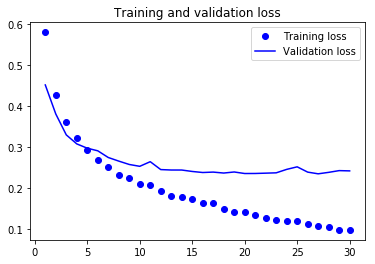

In [20]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()